In [32]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [39]:
df_project = pd.read_csv("../data/project_success.csv")


RangeIndex(start=0, stop=4, step=1)

In [41]:
df_project.head()

,Tasks,Min Cost,Average Cost,Max. Cost,Min VC,Avg VC,Max VC
0,Task 1,10,20,30,5,10,15
1,Task 2,5,10,15,2,5,8
2,Task 3,15,25,35,10,15,20
3,Total,30,55,80,17,30,43


In [103]:
sim_result = pd.DataFrame(data=None)

In [104]:
def get_random_int(minVal, maxVal):
    
    randVal = np.random.randint(minVal, maxVal)
    return randVal

In [118]:
min_list_FC = []
max_list_FC = []
avg_list_FC = []

min_list_VC = []
max_list_VC = []
avg_list_VC = []
sim_result = pd.DataFrame(data=None)


for idx in df_project.index:
    minFC = df_project.iloc[idx]['Min Cost']
    maxFC = df_project.iloc[idx]['Max. Cost']
    minVC = df_project.iloc[idx]['Min VC']
    maxVC = df_project.iloc[idx]['Max VC']

    
    colname_FC = df_project.iloc[idx]['Tasks'] + ' Fixed Cost'
    colname_VC = df_project.iloc[idx]['Tasks'] + ' Variable Cost'
    list_FC = []
    list_VC = []
    
    for i in range(100000):
        randVal = get_random_int(minFC, maxFC)
        list_FC.append(randVal)         
        list_VC.append(get_random_int(minVC, maxVC))
    
    
    sim_result[colname_FC] = list_FC
    sim_result[colname_VC] = list_VC
    
    min_list_FC.append(min(list_FC))
    min_list_VC.append(min(list_VC))
    
    max_list_FC.append(max(list_FC))
    max_list_VC.append(max(list_VC))

    avg_list_FC.append(np.mean(list_FC))
    avg_list_VC.append(np.mean(list_VC))


In [119]:
df_project['Min. Estimated FC'] =  min_list_FC
df_project['Avg. Estimated FC'] =  avg_list_FC
df_project['Max. Estimated FC'] =  max_list_FC

df_project['Min. Estimated VC'] =  min_list_VC
df_project['Avg. Estimated VC'] =  avg_list_VC
df_project['Max. Estimated VC'] =  max_list_VC

In [120]:
df_project

,Tasks,Min Cost,Average Cost,Max. Cost,Min VC,Avg VC,Max VC,Min. Estimated FC,Avg. Estimated FC,Max. Estimated FC,Min. Estimated VC,Avg. Estimated VC,Max. Estimated VC
0,Task 1,10,20,30,5,10,15,10,19.51691,29,5,9.49631,14
1,Task 2,5,10,15,2,5,8,5,9.50253,14,2,4.50052,7
2,Task 3,15,25,35,10,15,20,15,24.54406,34,10,14.49911,19
3,Total,30,55,80,17,30,43,30,54.48043,79,17,29.51764,42


In [121]:
sim_result.head()

,Task 1 Fixed Cost,Task 1 Variable Cost,Task 2 Fixed Cost,Task 2 Variable Cost,Task 3 Fixed Cost,Task 3 Variable Cost,Total Fixed Cost,Total Variable Cost
0,10,14,12,3,26,19,46,18
1,24,10,9,4,22,11,54,22
2,11,11,8,4,25,19,62,32
3,23,5,8,3,16,14,59,39
4,16,8,11,6,33,11,30,41


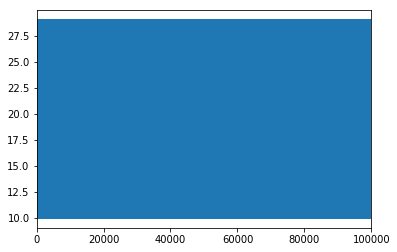

In [122]:
sim_result["Task 1 Fixed Cost"].plot()

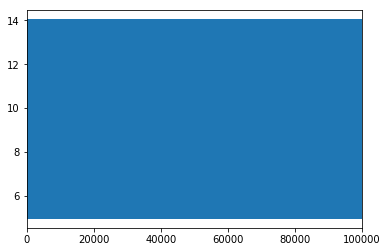

In [123]:
sim_result["Task 1 Variable Cost"].plot()

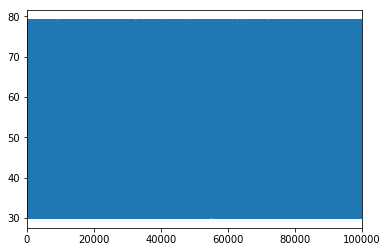

In [124]:
sim_result["Total Fixed Cost"].plot()

(array([2072.,    0., 2030.,    0., 1972.,    0., 2019.,    0., 1950.,
           0., 2048.,    0., 2017.,    0., 1933.,    0., 1973.,    0.,
        2066.,    0., 1981.,    0., 1987.,    0., 2081.,    0., 2157.,
           0., 2048.,    0., 1994.,    0., 1985.,    0., 2024.,    0.,
        1932.,    0., 1997.,    0., 1977.,    0., 1999.,    0., 1939.,
           0., 2014.,    0., 1959.,    0.,    0., 1930.,    0., 1972.,
           0., 1977.,    0., 1982.,    0., 1936.,    0., 2034.,    0.,
        2037.,    0., 1912.,    0., 2030.,    0., 1907.,    0., 1971.,
           0., 1968.,    0., 2084.,    0., 1972.,    0., 1958.,    0.,
        1999.,    0., 1995.,    0., 1985.,    0., 1990.,    0., 1993.,
           0., 2044.,    0., 2076.,    0., 2066.,    0., 1999.,    0.,
        2029.]),
 array([30.  , 30.49, 30.98, 31.47, 31.96, 32.45, 32.94, 33.43, 33.92,
        34.41, 34.9 , 35.39, 35.88, 36.37, 36.86, 37.35, 37.84, 38.33,
        38.82, 39.31, 39.8 , 40.29, 40.78, 41.27, 41.76, 42.

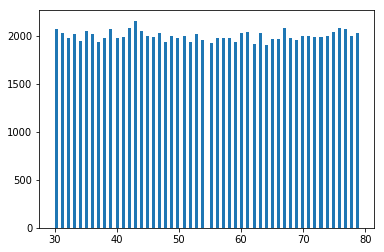

In [130]:
plt.hist(sim_result["Total Fixed Cost"], bins=100)